In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv("game_data_final.csv")

In [3]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2061,1942,NES,1985.0,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,9137,c2'a1Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113


In [8]:
# Top 3 Genre and Top 3 Publisher and Top 3 Platform

In [11]:
top3_publishers = data["Publisher"].value_counts().index[:3]
top3_genres = data["Genre"].value_counts().index[:3]
top3_platforms = data["Platform"].value_counts().index[:3]

In [12]:
top3_publishers

Index(['Electronic Arts', 'Activision', 'Namco Bandai Games'], dtype='object', name='Publisher')

In [13]:
top3_data = data.loc[
    (data["Publisher"].isin(top3_publishers))
    & (data["Genre"].isin(top3_genres))
    & (data["Platform"].isin(top3_platforms))
]

In [14]:
top3_data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
13,2742,[Prototype 2],PS3,2012.0,Action,Activision,3.978349,3.727034,0.848807,2.792725,11.447989
16,1604,[Prototype],PS3,2009.0,Action,Activision,4.569217,4.108402,1.187272,3.339269,13.181205
19,1741,007: Quantum of Solace,PS3,2008.0,Action,Activision,4.156030,4.346074,1.087977,3.390562,12.980643
21,4501,007: Quantum of Solace,PS2,2008.0,Action,Activision,3.228043,2.738800,2.585598,3.652926,11.780257
...,...,...,...,...,...,...,...,...,...,...,...
16438,14938,Yes! Precure 5 Go Go Zenin Shu Go! Dream Festival,DS,2008.0,Action,Namco Bandai Games,1.087977,0.592445,1.087977,0.394830,3.509168
16479,10979,Young Justice: Legacy,PS3,2013.0,Action,Namco Bandai Games,2.186589,1.087977,3.409089,0.394830,7.359902
16601,11802,ZhuZhu Pets: Quest for Zhu,DS,2011.0,Misc,Activision,2.340740,1.525543,3.103825,0.394830,7.372592
16636,9196,Zoobles! Spring to Life!,DS,2011.0,Misc,Activision,2.697415,1.087977,2.760718,0.394830,6.915540


# Multivariate Analysis

In [15]:
# 1. NNC -> Numerical, Numerical, Categorical
# Scatterplot between two numerical columns which has color to show the categorical column

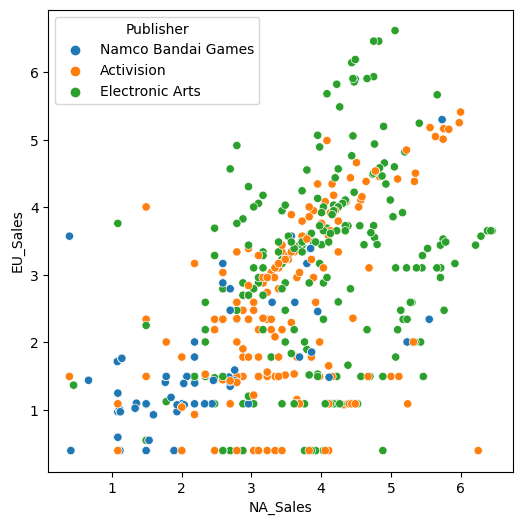

In [17]:
plt.figure(figsize = (6, 6))
sns.scatterplot(
    x = "NA_Sales",
    y = "EU_Sales",
    hue = "Publisher",
    data = top3_data
)
plt.show()

In [18]:
# 2. CCN -> Categorical, Categorical, Numerical
# Boxplot between a categorical and numerical column with the other categorical column as hue

<AxesSubplot:xlabel='Publisher', ylabel='Global_Sales'>

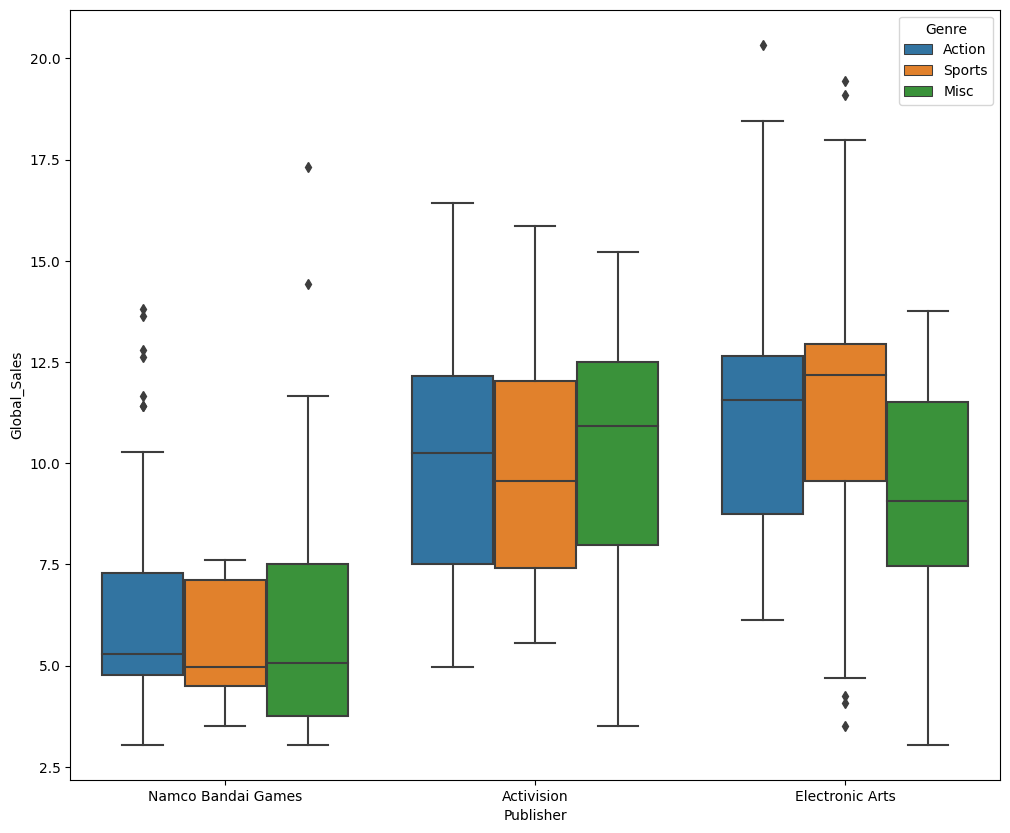

In [20]:
plt.figure(figsize = (12, 10))
sns.boxplot(
    x = "Publisher",
    y = "Global_Sales",
    hue = "Genre",
    data = top3_data
)

In [21]:
# 1. NNN -> Numerical, Numerical, Numerical
# Scatterplot between two numerical columns with the third governing the size

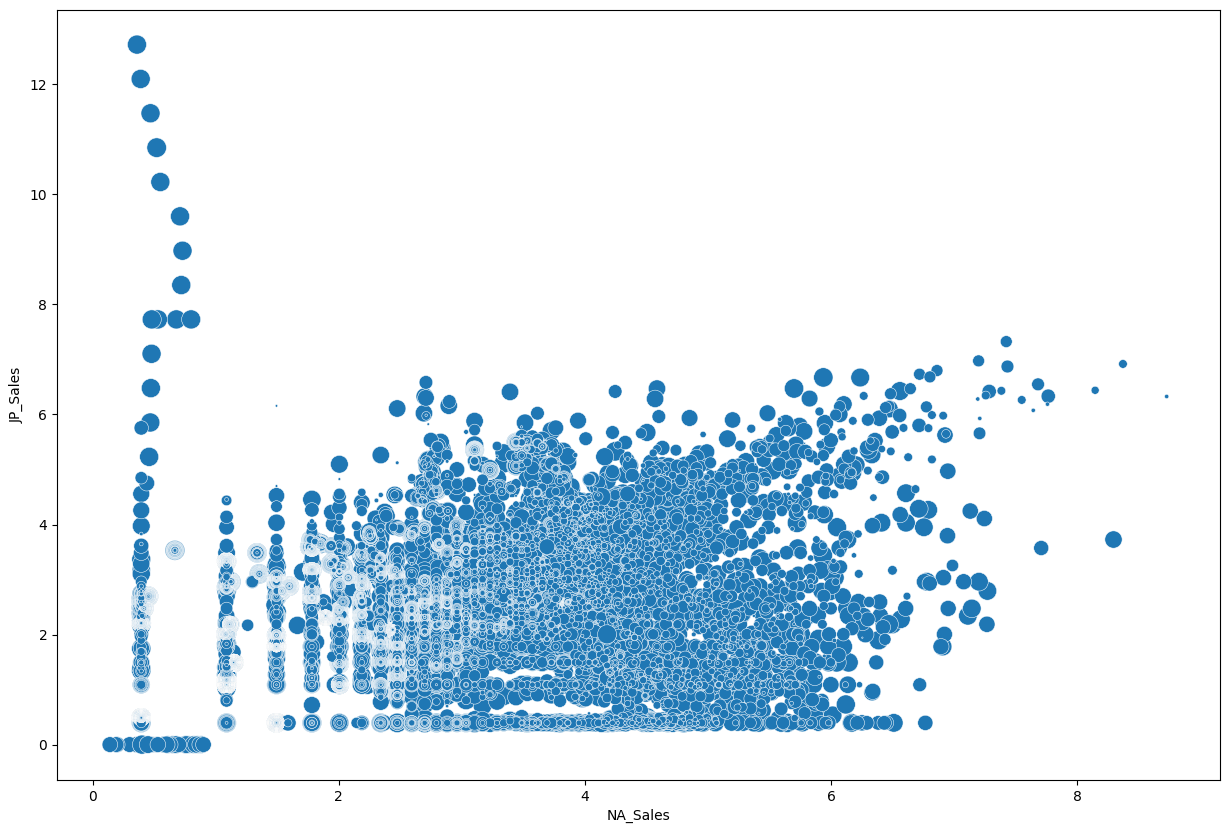

In [24]:
plt.figure(figsize = (15, 10))
sns.scatterplot(
    x = "NA_Sales",
    y = "JP_Sales",
    size = "Rank",
    sizes = (1, 200),
    data = data
)
plt.legend('', frameon = False)

<Figure size 500x500 with 0 Axes>

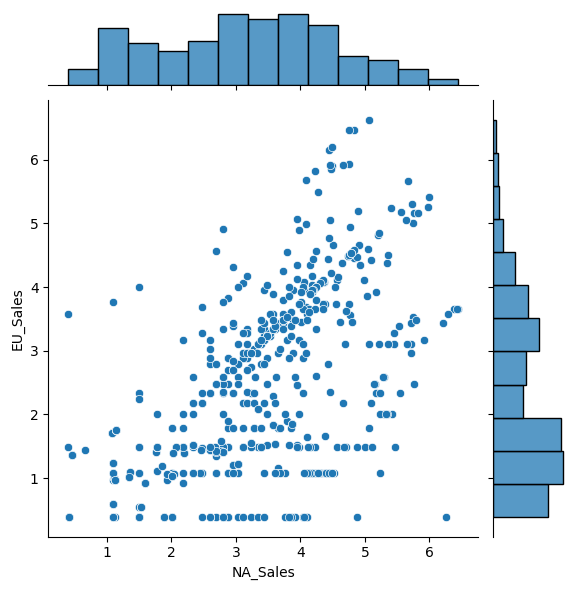

In [26]:
plt.figure(figsize = (5, 5))
sns.jointplot(
    x = "NA_Sales",
    y = "EU_Sales",
    data = top3_data
)
plt.show()

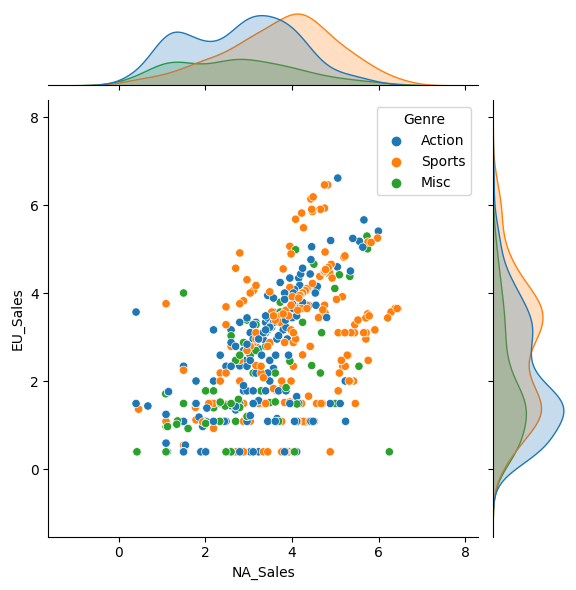

In [27]:
sns.jointplot(
    x = "NA_Sales",
    y = "EU_Sales",
    hue = "Genre",
    data = top3_data
)

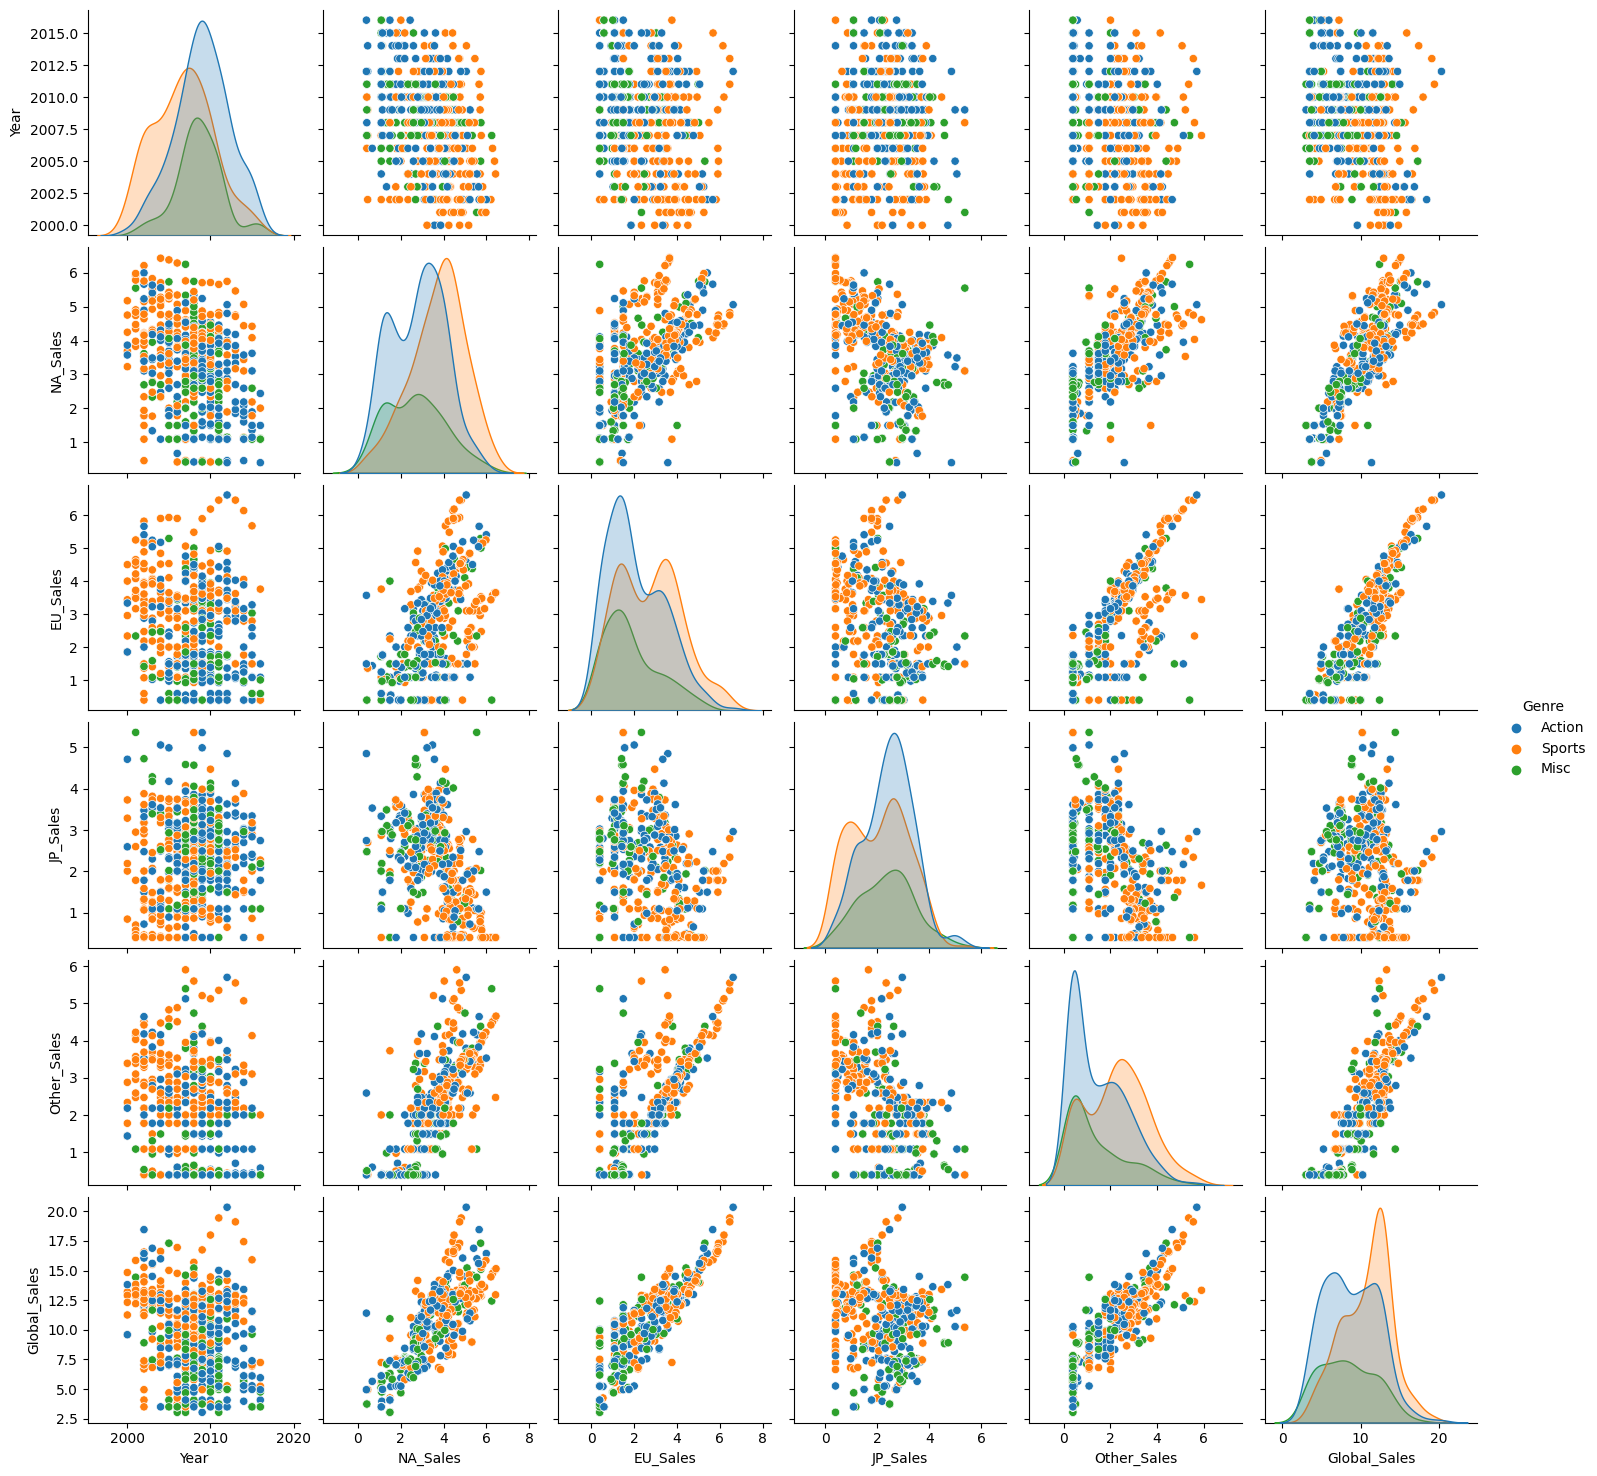

In [28]:
sns.pairplot(data = top3_data, hue = "Genre")

In [30]:
top3_data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
13,2742,[Prototype 2],PS3,2012.0,Action,Activision,3.978349,3.727034,0.848807,2.792725,11.447989
16,1604,[Prototype],PS3,2009.0,Action,Activision,4.569217,4.108402,1.187272,3.339269,13.181205
19,1741,007: Quantum of Solace,PS3,2008.0,Action,Activision,4.156030,4.346074,1.087977,3.390562,12.980643
21,4501,007: Quantum of Solace,PS2,2008.0,Action,Activision,3.228043,2.738800,2.585598,3.652926,11.780257
...,...,...,...,...,...,...,...,...,...,...,...
16438,14938,Yes! Precure 5 Go Go Zenin Shu Go! Dream Festival,DS,2008.0,Action,Namco Bandai Games,1.087977,0.592445,1.087977,0.394830,3.509168
16479,10979,Young Justice: Legacy,PS3,2013.0,Action,Namco Bandai Games,2.186589,1.087977,3.409089,0.394830,7.359902
16601,11802,ZhuZhu Pets: Quest for Zhu,DS,2011.0,Misc,Activision,2.340740,1.525543,3.103825,0.394830,7.372592
16636,9196,Zoobles! Spring to Life!,DS,2011.0,Misc,Activision,2.697415,1.087977,2.760718,0.394830,6.915540


In [29]:
top3_data.corr() # Gives you a matrix of correlation between all columns

ValueError: could not convert string to float: '.hack: Sekai no Mukou ni + Versus'

In [35]:
numerical_data = top3_data[["Rank", "Year", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]]

In [36]:
numerical_data.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.328705,-0.873726,-0.735711,0.115459,-0.857567,-0.911721
Year,0.328705,1.000000,-0.354256,-0.178026,0.055864,-0.239876,-0.280351
NA_Sales,-0.873726,-0.354256,1.000000,0.617483,-0.233315,0.794353,0.856300
EU_Sales,-0.735711,-0.178026,0.617483,1.000000,-0.208249,0.771105,0.864147
JP_Sales,0.115459,0.055864,-0.233315,-0.208249,1.000000,-0.355825,-0.014193
Other_Sales,-0.857567,-0.239876,0.794353,0.771105,-0.355825,1.000000,0.878816
Global_Sales,-0.911721,-0.280351,0.856300,0.864147,-0.014193,0.878816,1.000000


<AxesSubplot:>

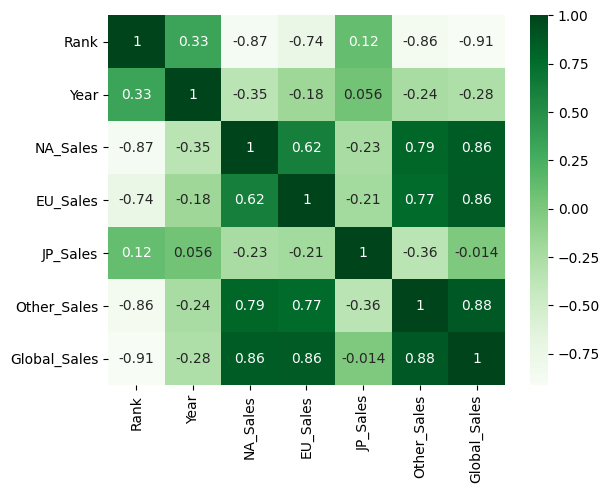

In [45]:
sns.heatmap(
    numerical_data.corr(),
    cmap = "Greens",
    annot = True
)

In [46]:
# plt.colormaps()

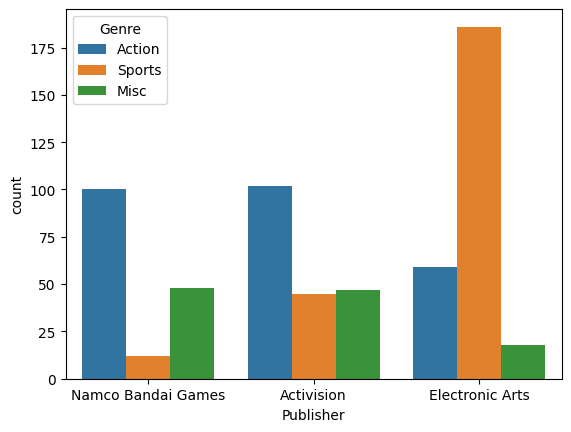

In [52]:
sns.countplot(x = "Publisher", hue = "Genre", data = top3_data)
plt.show()

In [53]:
top3_data.loc[top3_data["Genre"] == "Action"]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
13,2742,[Prototype 2],PS3,2012.0,Action,Activision,3.978349,3.727034,0.848807,2.792725,11.447989
16,1604,[Prototype],PS3,2009.0,Action,Activision,4.569217,4.108402,1.187272,3.339269,13.181205
19,1741,007: Quantum of Solace,PS3,2008.0,Action,Activision,4.156030,4.346074,1.087977,3.390562,12.980643
21,4501,007: Quantum of Solace,PS2,2008.0,Action,Activision,3.228043,2.738800,2.585598,3.652926,11.780257
...,...,...,...,...,...,...,...,...,...,...,...
16354,4711,X-Men: The Official Game,PS2,2006.0,Action,Activision,3.390562,3.167419,3.166967,2.004268,11.664077
16357,10403,X-Men: The Official Game,DS,2006.0,Action,Activision,2.697415,1.428818,2.599771,0.394830,7.098241
16437,13483,Yes! PreCure 5,DS,2007.0,Action,Namco Bandai Games,1.493442,0.394830,1.781124,0.394830,4.085704
16438,14938,Yes! Precure 5 Go Go Zenin Shu Go! Dream Festival,DS,2008.0,Action,Namco Bandai Games,1.087977,0.592445,1.087977,0.394830,3.509168


In [56]:
top3_data["Publisher"].value_counts()

Publisher
Electronic Arts       263
Activision            194
Namco Bandai Games    160
Name: count, dtype: int64

In [58]:
action_data = top3_data.loc[top3_data["Genre"] == "Action"]

In [62]:
action_data_values = action_data["Publisher"].value_counts()

In [63]:
action_data_values

Publisher
Activision            102
Namco Bandai Games    100
Electronic Arts        59
Name: count, dtype: int64

<BarContainer object of 3 artists>

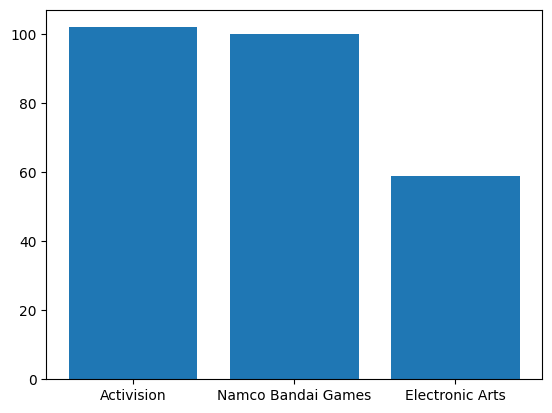

In [64]:
plt.bar(action_data_values.index, action_data_values)

In [65]:
sports_data = top3_data.loc[top3_data["Genre"] == "Sports"]
sports_data_values = sports_data["Publisher"].value_counts()

<BarContainer object of 3 artists>

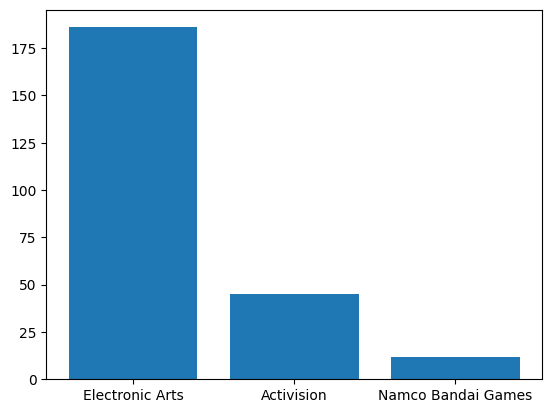

In [66]:
plt.bar(sports_data_values.index, sports_data_values)

<BarContainer object of 3 artists>

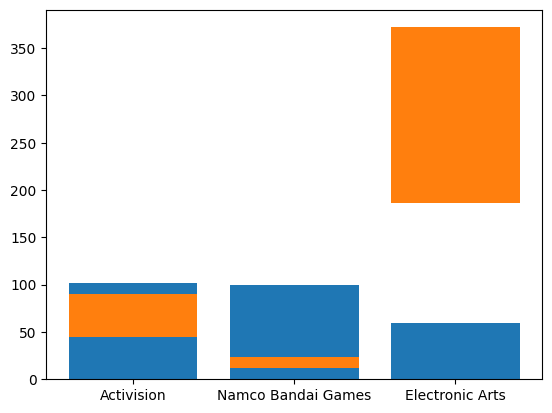

In [69]:
plt.bar(action_data_values.index, action_data_values)
plt.bar(sports_data_values.index, sports_data_values, bottom = sports_data_values)